# Project Description
Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposi.


# About The Dataset
The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or no.t
You are provided with following 2 files:
1.     train.csv : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.
2.     test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit.
 
Dataset Attributes
Here is the description of all the variables:
•	Variable: Definition
•	ID: Unique client ID
•	age: Age of the client
•	job: Type of job
•	marital: Marital status of the client
•	education: Education level
•	default: Credit in default.
•	housing: Housing loan
•	loan: Personal loan
•	contact: Type of communication
•	month: Contact month
•	day_of_week: Day of week of contact
•	duration: Contact duration
•	campaign: number of contacts performed during this campaign to the client
•	pdays: number of days that passed by after the client was last contacted
•	previous: number of contacts performed before this campaign
•	poutcome: outcome of the previous marketing campaign
Output variable (desired target):
•	Subscribed (target): has the client subscribed a term deposit? (YES/NO)



Dataset Link-
•	https://github.com/FlipRoboTechnologies/ML-Datasets/tree/main/Bank%20Marketing
•	https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Bank%20Marketing/termdeposit_test.csv
•	https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv


In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Dataset
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv')
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


# EDA

In [3]:
# Dimension of Data
df.shape
print('Dataset has {} columns and {} rows'.format(df.shape[1],df.shape[0]))

Dataset has 18 columns and 31647 rows


Subscribe is our target variable. and rest are independent variable.

In [4]:
# Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [7]:
# Datatype in dataset
df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

object, int types of data present in dataset.

In [8]:
# Checking Null Values
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

No Null values in dataset.

In [9]:
# Value count oif each column in Dataset.
for d in df.columns:
    print(df[d].value_counts())
    print('Number of unique values',df[d].nunique())
    print('\n')

26110    1
13339    1
39681    1
15135    1
26037    1
        ..
1247     1
15584    1
25376    1
38699    1
14156    1
Name: ID, Length: 31647, dtype: int64
Number of unique values 31647


32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64
Number of unique values 76


blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64
Number of unique values 12


married     19095
single       8922
divorced     3630
Name: marital, dtype: int64
Number of unique values 3


secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64
Number of unique values 4


no     31062
yes      585
Name: default, dtype: int64
Number o

ID column has unique value in each row and it's not relevant in predicting target, so dropping ID.

In [10]:
# Dropping ID Column.
df.drop('ID',axis=1,inplace=True)

In [11]:
df.shape

(31647, 17)

In [12]:
# Description of Data
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


1) In age, day, and campaign column mean is almost identical to median.
2) In balance,duration, pdays column mean is greater than median. which means they are right skewed.
3) In all the columns there is huge difference between 75th percentile and max. It inducates the presence of outliers in these columns.

# GRAPHICAL ANALYSIS

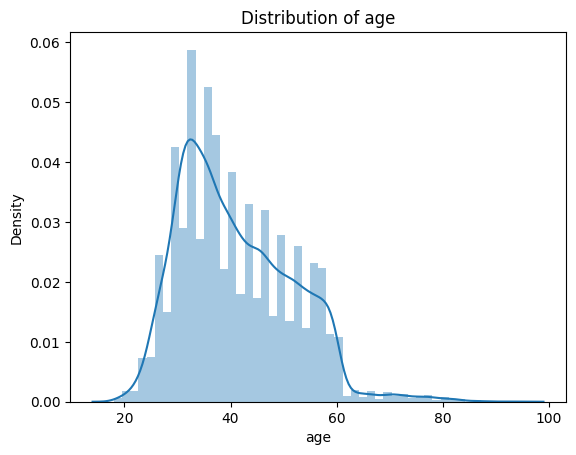

In [13]:
sns.distplot(df['age'])
plt.title('Distribution of age')
plt.show()

Normally distribured.

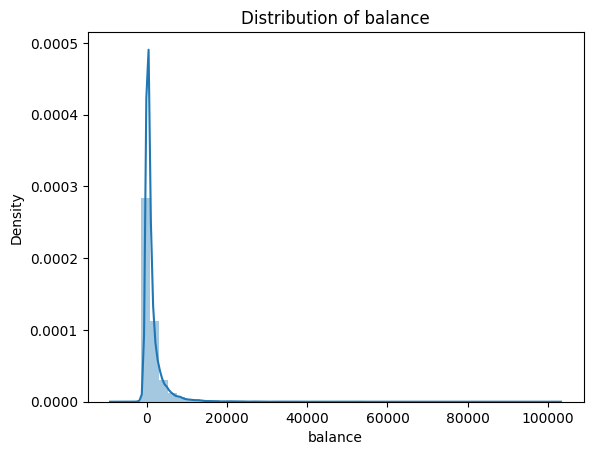

In [14]:
sns.distplot(df['balance'])
plt.title('Distribution of balance')
plt.show()

Right Skewed.

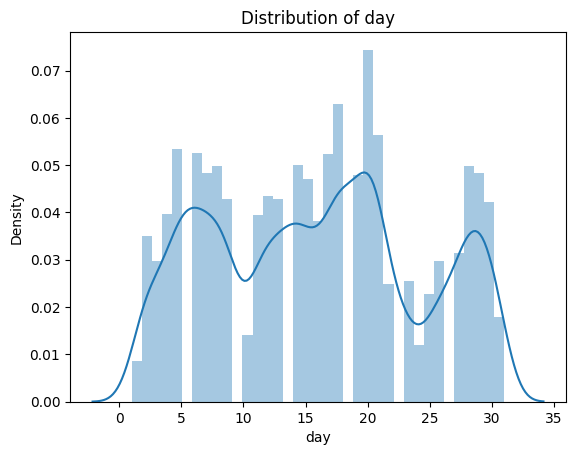

In [15]:
sns.distplot(df['day'])
plt.title('Distribution of day')
plt.show()

Normally distributed.

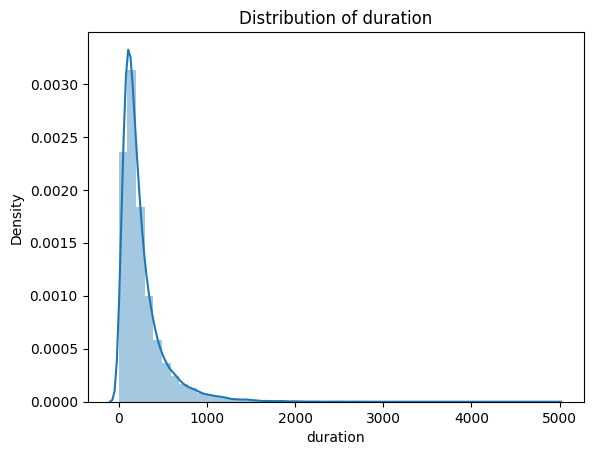

In [16]:
sns.distplot(df['duration'])
plt.title('Distribution of duration')
plt.show()

Right Skewed.

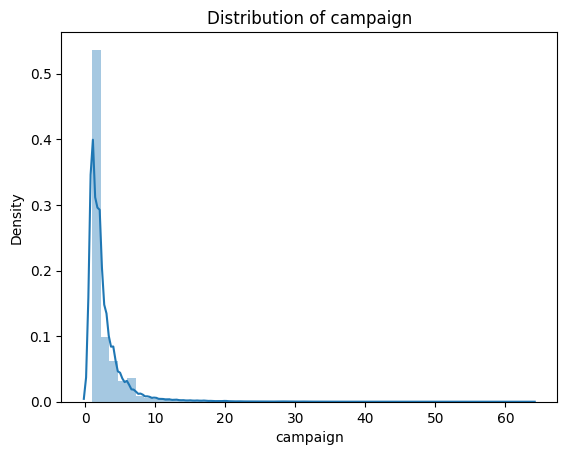

In [17]:
sns.distplot(df['campaign'])
plt.title('Distribution of campaign')
plt.show()

Right Skewed.

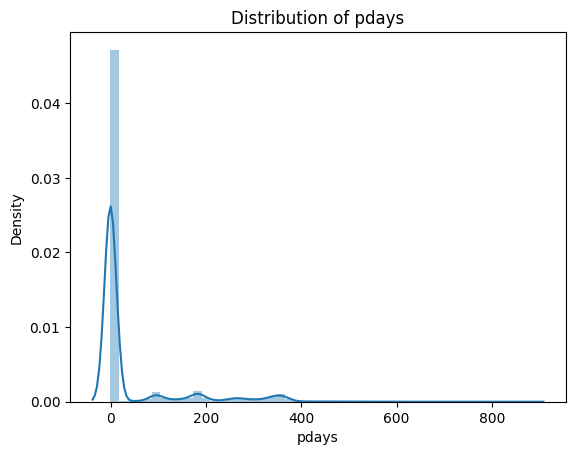

In [19]:
sns.distplot(df['pdays'])
plt.title('Distribution of pdays')
plt.show()

Right Skewed.

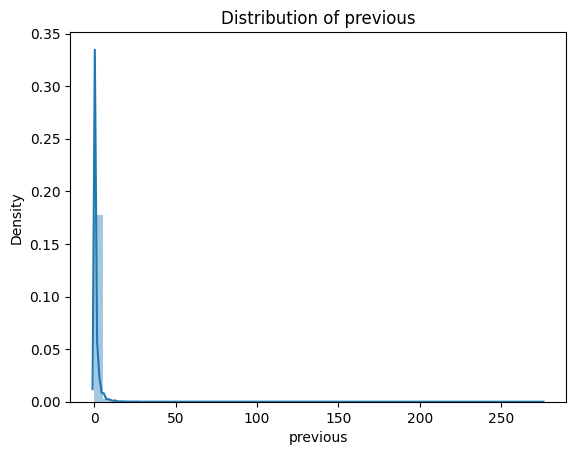

In [20]:
sns.distplot(df['previous'])
plt.title('Distribution of previous')
plt.show()

Right Skewed.

Biavariate Analysis

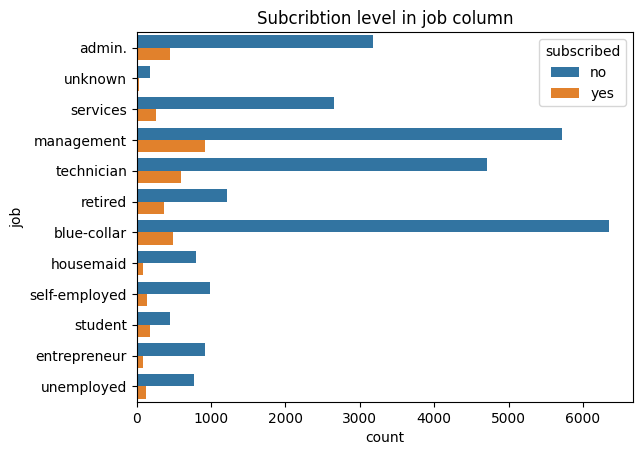

In [22]:
sns.countplot(y='job',data=df,hue='subscribed')
plt.title('Subcribtion level in job column')
plt.show()

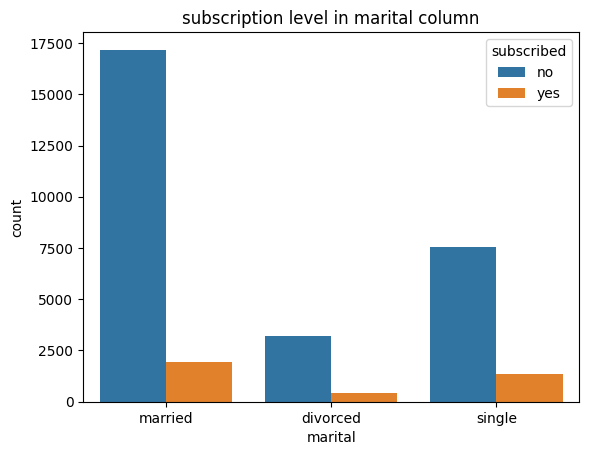

In [23]:
sns.countplot(x='marital',data=df,hue='subscribed')
plt.title('subscription level in marital column')
plt.show()

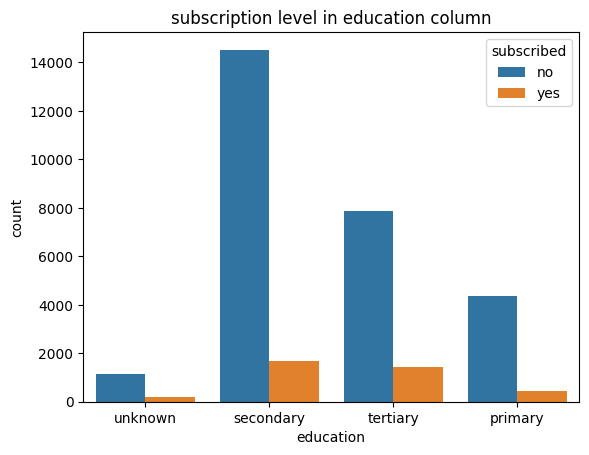

In [24]:
sns.countplot(x='education',data=df,hue='subscribed')
plt.title('subscription level in education column')
plt.show()

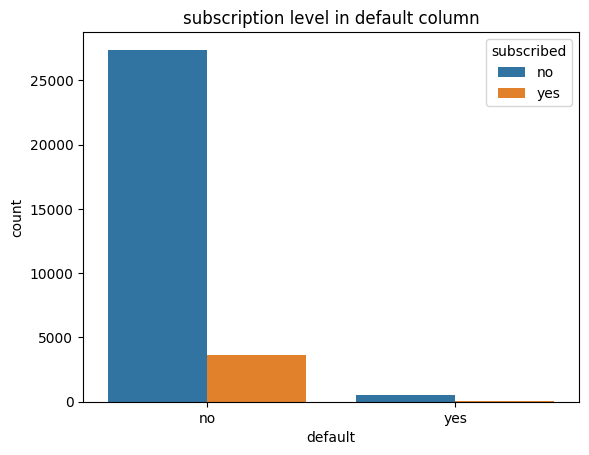

In [25]:
sns.countplot(x='default',data=df,hue='subscribed')
plt.title('subscription level in default column')
plt.show()

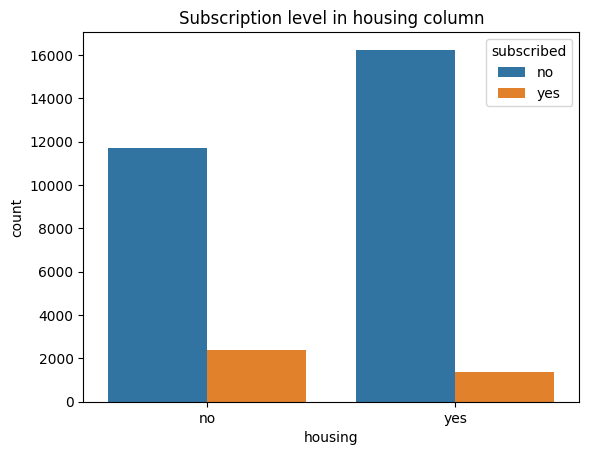

In [26]:
sns.countplot(x='housing',data=df,hue='subscribed')
plt.title('Subscription level in housing column')
plt.show()

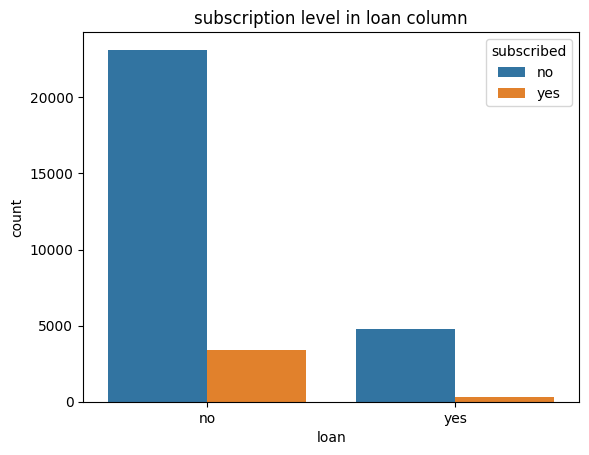

In [27]:
sns.countplot(x='loan',data=df,hue='subscribed')
plt.title('subscription level in loan column')
plt.show()

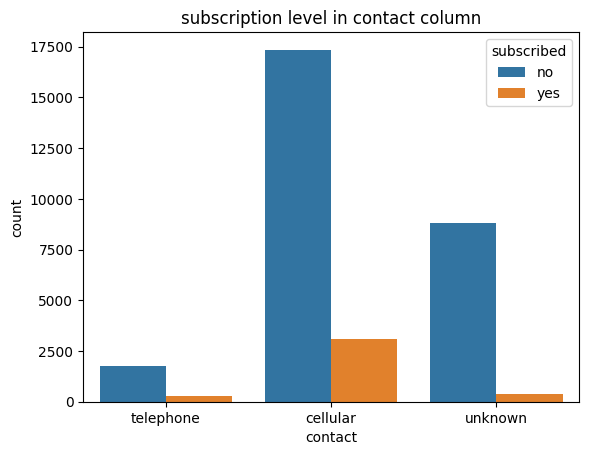

In [28]:
sns.countplot(x='contact',data=df,hue='subscribed')
plt.title('subscription level in contact column')
plt.show()

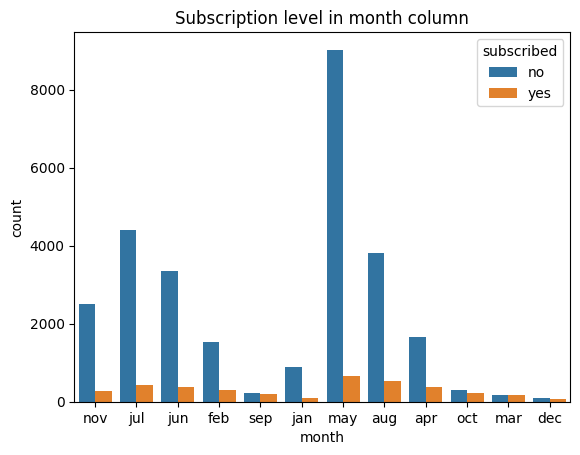

In [29]:
sns.countplot(x='month',data=df,hue='subscribed')
plt.title('Subscription in month column')
plt.show()

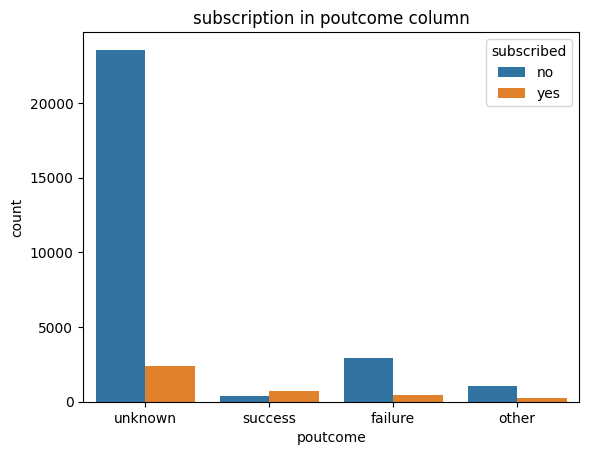

In [30]:
sns.countplot(x='poutcome',data=df,hue='subscribed')
plt.title('subscription in poutcome column')
plt.show()

Multivariate

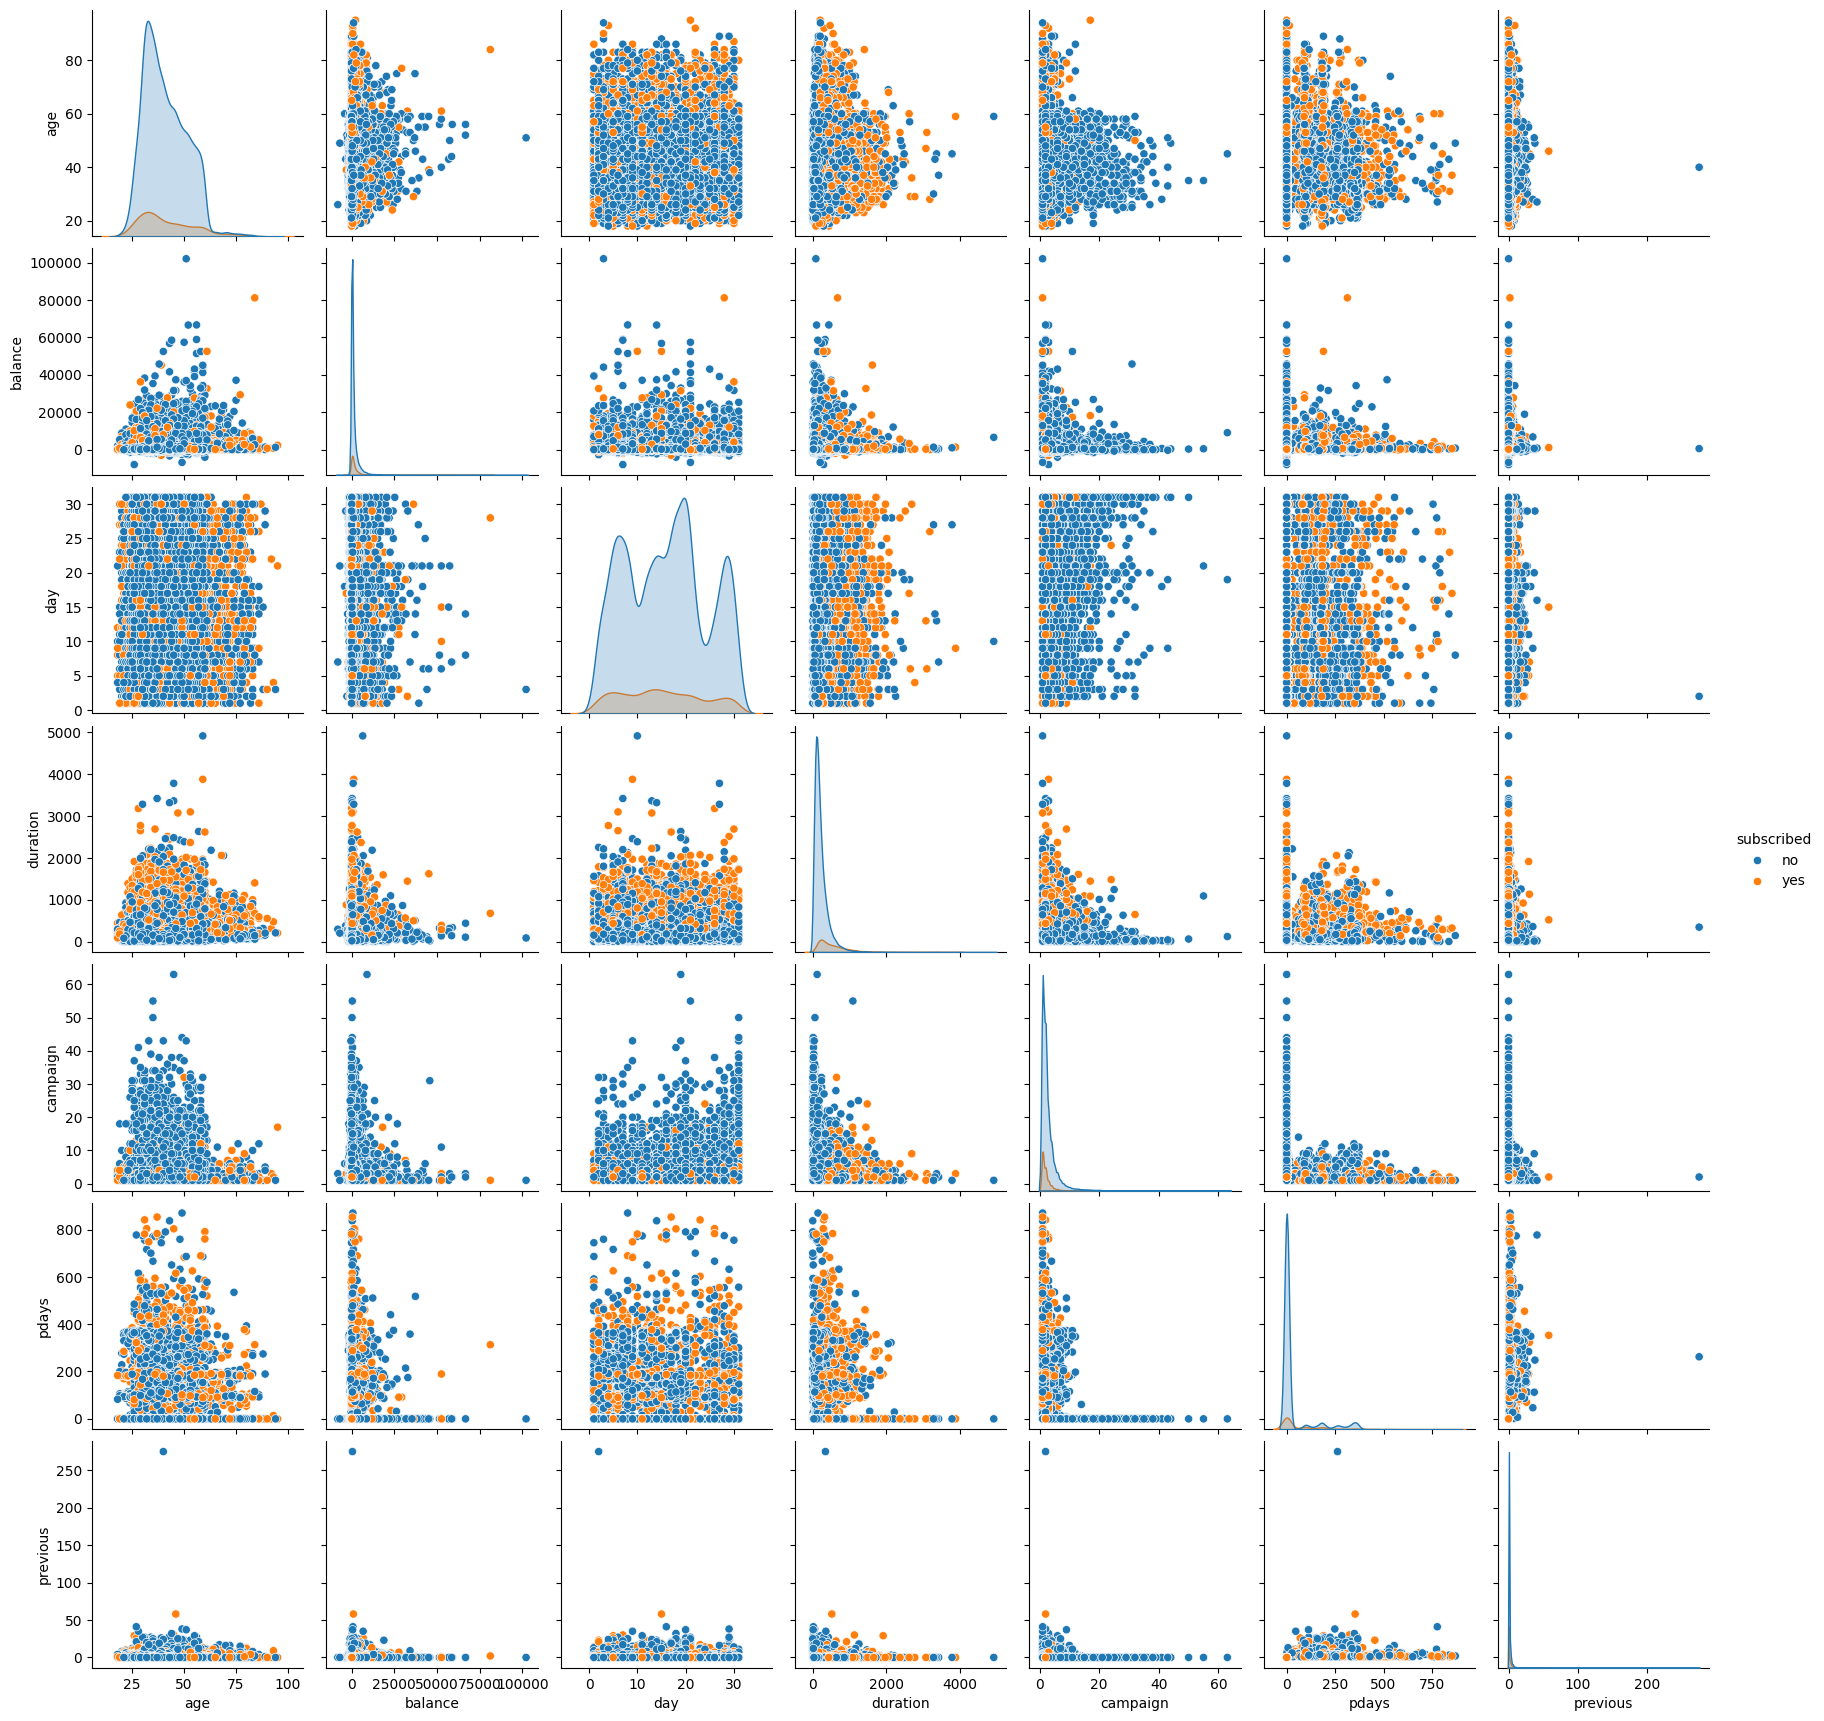

In [32]:
# using pairplot
sns.pairplot(df,hue='subscribed')
plt.show()

# Encoding

In [33]:
from sklearn.preprocessing import LabelEncoder
for c in df.columns:
    if df[c].dtype=='object':
        df[c]=LabelEncoder().fit_transform(df[c])

In [34]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0


# Outliers and Skewness

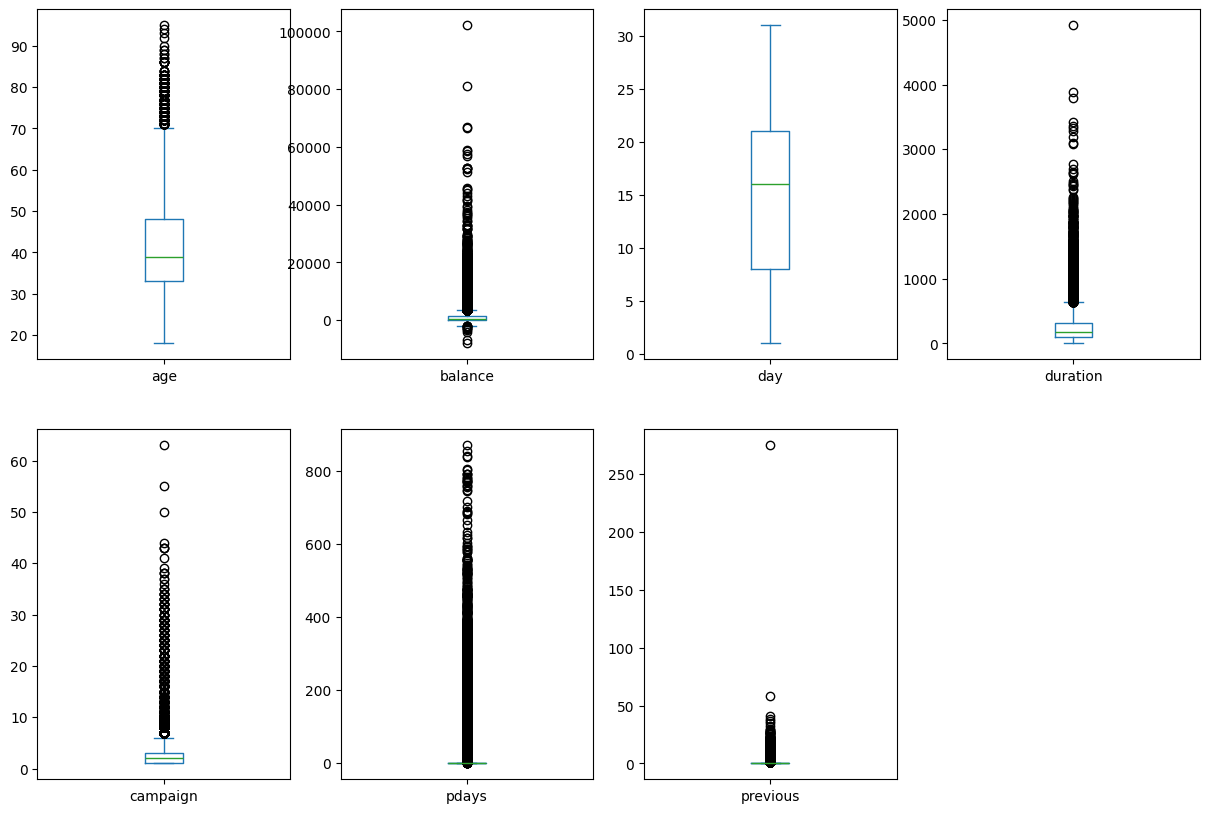

In [35]:
# Pltting box plot to check outliers
df[['age','balance','day','duration','campaign','pdays','previous']].plot(kind='box',subplots=True,layout=(2,4),figsize=(15,10))
plt.show()

In [36]:
# Checking skewness
df.skew()

age            0.681607
job            0.264817
marital       -0.100071
education      0.199441
default        7.149903
balance        7.995696
housing       -0.223918
loan           1.833474
contact        0.758602
day            0.087185
month         -0.486498
duration       3.199766
campaign       4.873935
pdays          2.642374
previous      49.302348
poutcome      -1.996421
subscribed     2.377445
dtype: float64

Creating Copies to apply skewness removal methods.

In [37]:
# Creating copy
df1=df.copy()

In [38]:
df1.skew()

age            0.681607
job            0.264817
marital       -0.100071
education      0.199441
default        7.149903
balance        7.995696
housing       -0.223918
loan           1.833474
contact        0.758602
day            0.087185
month         -0.486498
duration       3.199766
campaign       4.873935
pdays          2.642374
previous      49.302348
poutcome      -1.996421
subscribed     2.377445
dtype: float64

In [39]:
# Checking cuberoot
df1['age']=np.cbrt(df1['age'])
df1['duration']=np.cbrt(df1['duration'])
df1['campaign']=np.cbrt(df1['campaign'])
df1['pdays']=np.cbrt(df1['pdays'])
df1['previous']=np.cbrt(df1['previous'])
df1['balance']=np.cbrt(df1['balance'])

In [41]:
df1.skew()

age           0.286363
job           0.264817
marital      -0.100071
education     0.199441
default       7.149903
balance      -0.086014
housing      -0.223918
loan          1.833474
contact       0.758602
day           0.087185
month        -0.486498
duration      0.647275
campaign      1.667938
pdays         1.779036
previous      2.079738
poutcome     -1.996421
subscribed    2.377445
dtype: float64

In [42]:
df1.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [43]:
# Square root
df1['duration']=np.sqrt(df1['duration'])
df1['campaign']=np.sqrt(df1['campaign'])
df1['previous']=np.sqrt(df1['previous'])
df1['pdays']=np.sqrt(df1['pdays'])

In [44]:
df1.skew()

age           0.286363
job           0.264817
marital      -0.100071
education     0.199441
default       7.149903
balance      -0.086014
housing      -0.223918
loan          1.833474
contact       0.758602
day           0.087185
month        -0.486498
duration      0.099228
campaign      1.230326
pdays        -1.475422
previous      1.745445
poutcome     -1.996421
subscribed    2.377445
dtype: float64

In [45]:
df1.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
balance           0
housing           0
loan              0
contact           0
day               0
month             0
duration          0
campaign          0
pdays         25924
previous          0
poutcome          0
subscribed        0
dtype: int64

In [46]:
# Importing Boxcox
from scipy.stats import boxcox

In [47]:
df2=df1.copy()

In [48]:
# Using boxcox at lmbda 0.
df1['campaign']=boxcox(df1['campaign'],0)
df1['previous']=boxcox(df1['previous'],0)

In [49]:
df1.skew()

age           0.286363
job           0.264817
marital      -0.100071
education     0.199441
default       7.149903
balance      -0.086014
housing      -0.223918
loan          1.833474
contact       0.758602
day           0.087185
month        -0.486498
duration      0.099228
campaign      0.887244
pdays        -1.475422
previous           NaN
poutcome     -1.996421
subscribed    2.377445
dtype: float64

In [50]:
df1.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
balance           0
housing           0
loan              0
contact           0
day               0
month             0
duration          0
campaign          0
pdays         25924
previous          0
poutcome          0
subscribed        0
dtype: int64

In [52]:
df3=df2.copy()

In [53]:
# Using boxcox at lmbda= 0.5
df2['campaign']=boxcox(df2['campaign'],0.5)
df2['previous']=boxcox(df2['previous'],0.5)

In [54]:
df2.skew()

age           0.286363
job           0.264817
marital      -0.100071
education     0.199441
default       7.149903
balance      -0.086014
housing      -0.223918
loan          1.833474
contact       0.758602
day           0.087185
month        -0.486498
duration      0.099228
campaign     -0.018145
pdays        -1.475422
previous     -0.192860
poutcome     -1.996421
subscribed    2.377445
dtype: float64

In [55]:
df2.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
balance           0
housing           0
loan              0
contact           0
day               0
month             0
duration          0
campaign          0
pdays         25924
previous      25924
poutcome          0
subscribed        0
dtype: int64

In [56]:
# using boxcox at lmbda 1
df3['campaign']=boxcox(df3['campaign'],1)
df3['previous']=boxcox(df3['previous'],1)

In [57]:
df3.skew()

age           0.286363
job           0.264817
marital      -0.100071
education     0.199441
default       7.149903
balance      -0.086014
housing      -0.223918
loan          1.833474
contact       0.758602
day           0.087185
month        -0.486498
duration      0.099228
campaign      1.048397
pdays        -1.475422
previous      0.886865
poutcome     -1.996421
subscribed    2.377445
dtype: float64

In [58]:
df3.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
balance           0
housing           0
loan              0
contact           0
day               0
month             0
duration          0
campaign          0
pdays         25924
previous      25924
poutcome          0
subscribed        0
dtype: int64

Removing Skewness from original data

In [59]:
df.skew()

age            0.681607
job            0.264817
marital       -0.100071
education      0.199441
default        7.149903
balance        7.995696
housing       -0.223918
loan           1.833474
contact        0.758602
day            0.087185
month         -0.486498
duration       3.199766
campaign       4.873935
pdays          2.642374
previous      49.302348
poutcome      -1.996421
subscribed     2.377445
dtype: float64

In [60]:
# Using cuberoot
df['age']=np.cbrt(df['age'])
df['duration']=np.cbrt(df['duration'])
df['campaign']=np.cbrt(df['campaign'])
df['pdays']=np.cbrt(df['pdays'])
df['previous']=np.cbrt(df['previous'])
df['balance']=np.cbrt(df['balance'])

In [61]:
df.skew()

age           0.286363
job           0.264817
marital      -0.100071
education     0.199441
default       7.149903
balance      -0.086014
housing      -0.223918
loan          1.833474
contact       0.758602
day           0.087185
month        -0.486498
duration      0.647275
campaign      1.667938
pdays         1.779036
previous      2.079738
poutcome     -1.996421
subscribed    2.377445
dtype: float64

In [62]:
# using square root
df['duration']=np.sqrt(df['duration'])
df['campaign']=np.sqrt(df['campaign'])
df['previous']=np.sqrt(df['previous'])

In [63]:
df.skew()

age           0.286363
job           0.264817
marital      -0.100071
education     0.199441
default       7.149903
balance      -0.086014
housing      -0.223918
loan          1.833474
contact       0.758602
day           0.087185
month        -0.486498
duration      0.099228
campaign      1.230326
pdays         1.779036
previous      1.745445
poutcome     -1.996421
subscribed    2.377445
dtype: float64

In [64]:
df['campaign']=boxcox(df['campaign'],0.5)
df['previous']=boxcox(df['previous'],0.5)

In [65]:
df.skew()

age           0.286363
job           0.264817
marital      -0.100071
education     0.199441
default       7.149903
balance      -0.086014
housing      -0.223918
loan          1.833474
contact       0.758602
day           0.087185
month        -0.486498
duration      0.099228
campaign      1.048397
pdays         1.779036
previous      1.678639
poutcome     -1.996421
subscribed    2.377445
dtype: float64

In [66]:
df.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

Removing outliers

In [67]:
from scipy.stats import zscore

In [68]:
z=np.abs(zscore(df[['age','balance','duration','pdays','previous','campaign']]))
z

,age,balance,duration,pdays,previous,campaign
0,1.383398,0.757778,1.425433,0.461627,0.468680,0.047919
1,0.961854,0.911548,0.754505,0.461627,0.468680,0.047919
2,1.446270,0.328224,0.277344,0.461627,0.468680,0.965785
3,1.460966,1.123262,1.927712,1.542654,2.179327,0.965785
4,0.961854,0.384677,0.827671,0.461627,0.468680,0.965785
...,...,...,...,...,...,...
31642,1.198489,1.130128,0.511669,0.461627,0.468680,0.047919
31643,1.145007,0.032392,1.006490,0.461627,0.468680,0.047919
31644,0.847342,0.102219,1.573769,0.461627,0.468680,0.514095
31645,1.460966,0.208341,1.993966,2.503686,2.503608,1.751664


In [69]:
print(np.where(z>3))

(array([   21,   109,   134,   149,   158,   245,   260,   324,   339,
         395,   401,   403,   403,   435,   571,   597,   649,   659,
         682,   717,   746,   756,   772,   818,   848,   851,   920,
         986,   996,  1002,  1039,  1084,  1089,  1240,  1333,  1347,
        1360,  1398,  1423,  1448,  1462,  1471,  1498,  1539,  1553,
        1601,  1627,  1660,  1684,  1711,  1713,  1782,  1789,  1888,
        1959,  2023,  2080,  2108,  2128,  2130,  2251,  2290,  2368,
        2405,  2498,  2539,  2599,  2610,  2646,  2654,  2669,  2688,
        2714,  2718,  2748,  2757,  2776,  2794,  2911,  2949,  2966,
        3038,  3050,  3064,  3073,  3077,  3155,  3173,  3179,  3182,
        3186,  3209,  3262,  3267,  3351,  3445,  3488,  3527,  3690,
        3785,  3787,  3865,  3870,  3944,  3963,  3976,  4062,  4091,
        4183,  4186,  4199,  4239,  4339,  4505,  4523,  4525,  4544,
        4548,  4612,  4676,  4679,  4725,  4727,  4731,  4741,  4747,
        4767,  4771

In [70]:
dfn=df[np.abs(z<3).all(axis=1)]

In [71]:
df.shape[0]-dfn.shape[0]

770

In [72]:
dfn.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,3.825862,0,1,3,0,12.456918,0,0,1,19,9,1.878922,0.118926,-1.000000,-2.000000,3,0
1,3.141381,11,1,1,0,1.442250,0,0,0,20,5,2.120835,0.118926,-1.000000,-2.000000,3,0
2,3.000000,7,1,1,0,9.622603,1,0,0,18,5,2.492883,0.000000,-1.000000,-2.000000,3,0
3,3.848501,4,0,2,0,14.868480,0,0,0,22,6,3.087947,0.000000,4.379519,0.191745,2,1
4,3.141381,9,1,1,0,4.918685,1,0,0,4,3,2.691311,0.000000,-1.000000,-2.000000,3,0


In [73]:
# Seperating Input Output Data
x=dfn.drop('subscribed',axis=1)
y=dfn['subscribed']

# Scaling

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
x=pd.DataFrame(StandardScaler().fit_transform(x),columns=x.columns)
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.413988,-1.320180,-0.277472,2.377541,-0.136033,0.790953,-1.124075,-0.440199,0.398452,0.390439,1.151905,-1.479968,-0.007400,-0.463585,-0.470344,0.443330
1,-0.965032,2.034716,-0.277472,-0.299458,-0.136033,-0.926642,-1.124075,-0.440199,-0.713333,0.510852,-0.180094,-0.787654,-0.007400,-0.463585,-0.470344,0.443330
2,-1.456421,0.814754,-0.277472,-0.299458,-0.136033,0.348978,0.889621,-0.440199,-0.713333,0.270027,-0.180094,0.277085,-0.998662,-0.463585,-0.470344,0.443330
3,1.492672,-0.100218,-1.924749,1.039042,-0.136033,1.167005,-1.124075,-0.440199,-0.713333,0.751677,0.152906,1.980059,-0.998662,1.543154,2.172072,-0.572076
4,-0.965032,1.424735,-0.277472,-0.299458,-0.136033,-0.384537,0.889621,-0.440199,-0.713333,-1.415751,-0.846094,0.844953,-0.998662,-0.463585,-0.470344,0.443330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30872,-0.301734,1.424735,1.369806,1.039042,-0.136033,0.554262,-1.124075,-0.440199,1.510237,-1.174925,0.152906,1.041431,-0.007400,-0.463585,-0.470344,0.443330
30873,-1.205073,-0.100218,1.369806,1.039042,-0.136033,-1.151543,0.889621,-0.440199,-0.713333,-0.452449,0.818906,-0.537078,-0.007400,-0.463585,-0.470344,0.443330
30874,1.172164,-0.100218,-1.924749,1.039042,-0.136033,-0.022066,-1.124075,2.271699,-0.713333,-1.295338,0.152906,1.029473,-0.007400,-0.463585,-0.470344,0.443330
30875,-0.848870,-0.100218,1.369806,1.039042,-0.136033,-0.093911,-1.124075,-0.440199,-0.713333,-1.054513,-1.512094,-1.633032,0.599555,-0.463585,-0.470344,0.443330


# VIF

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [77]:
def calculate_vif(data):
    vif=pd.DataFrame()
    vif['variables']=data.columns
    vif['VIF FACTOR']=[variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return(vif)

In [78]:
calculate_vif(x)

,variables,VIF FACTOR
0,age,1.291129
1,job,1.050221
2,marital,1.244780
3,education,1.067672
4,default,1.045026
5,balance,1.090286
6,housing,1.195202
7,loan,1.030623
8,contact,1.332884
9,day,1.029619


In [79]:
x.drop('pdays',axis=1,inplace=True)

In [81]:
calculate_vif(x)

,variables,VIF FACTOR
0,age,1.290620
1,job,1.049767
2,marital,1.244757
3,education,1.066014
4,default,1.045020
5,balance,1.088985
6,housing,1.182156
7,loan,1.030357
8,contact,1.331834
9,day,1.028701


# Handling Class Imbalance Problem using SMOTE

In [82]:
print(y.value_counts())

0    27286
1     3591
Name: subscribed, dtype: int64


In [83]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE

In [84]:
# Balancing Class
xn,yn=SMOTE().fit_resample(x,y)

In [85]:
yn.value_counts()

0    27286
1    27286
Name: subscribed, dtype: int64

# Model

In [86]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [87]:
# creating function
def random_state(x,y):
    acc=0
    random_s=0
    for i in range(1,300):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
        dtc=DecisionTreeClassifier()
        dtc.fit(x_train,y_train)
        accuracy=accuracy_score(y_test,dtc.predict(x_test))
        if accuracy>acc:
            acc=accuracy
            random_s=i
    print('Best accuracy {} at {}.'.format(acc,random_s))

In [88]:
random_state(xn,yn)

Best accuracy 0.9114341558758856 at 284.


In [89]:
# Splitting Train Test Data
xtrain,xtest,ytrain,ytest=train_test_split(xn,yn,test_size=0.30,random_state=284)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(38200, 15)
(16372, 15)
(38200,)
(16372,)


In [90]:
# importing Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

In [91]:
# Importing Classification Metrics
from sklearn.metrics import classification_report, confusion_matrix

In [92]:
# Creating Variables for ML Models
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
svc=SVC()
rfc=RandomForestClassifier()
gb=GaussianNB()
adc=AdaBoostClassifier()
gdc=GradientBoostingClassifier()
etc=ExtraTreesClassifier()
lr=LogisticRegression()
bgc=BaggingClassifier()

In [93]:
# Creating list with Ml model Variables
models=[dtc,knn,svc,rfc,gb,adc,gdc,etc,lr,bgc]

In [94]:
for m in models:
    m.fit(xtrain,ytrain)
    print(m)
    print('Accuracy_score',accuracy_score(ytest,m.predict(xtest)))
    print(confusion_matrix(ytest,m.predict(xtest)))
    print(classification_report(ytest,m.predict(xtest)))
    print('CrossValScore')
    score=cross_val_score(m,xn,yn)
    print(score)
    print(score.mean())
    print("difference between accuracy score and cv mean score for {} is".format(m),round(accuracy_score(ytest,m.predict(xtest))*100-score.mean()*100,2))
    print('*'*100)
    print('\n')

DecisionTreeClassifier()
Accuracy_score 0.9116173955533838
[[7423  798]
 [ 649 7502]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      8221
           1       0.90      0.92      0.91      8151

    accuracy                           0.91     16372
   macro avg       0.91      0.91      0.91     16372
weighted avg       0.91      0.91      0.91     16372

CrossValScore
[0.83362345 0.91690334 0.91863661 0.91588785 0.920011  ]
0.9010124514055711
difference between accuracy score and cv mean score for DecisionTreeClassifier() is 1.06
****************************************************************************************************


KNeighborsClassifier()
Accuracy_score 0.9055094063034449
[[6752 1469]
 [  78 8073]]
              precision    recall  f1-score   support

           0       0.99      0.82      0.90      8221
           1       0.85      0.99      0.91      8151

    accuracy                           0.91     16372
   

# Hyper Parameter Tuning

In [95]:
# Importing Gridsearch CV
from sklearn.model_selection import GridSearchCV

In [111]:
params={'max_features':['sqrt','log2',None],
       'criterion':['gini','entropy','log_loss'],
       'class_weight':['balanced','balanced_subsample']}

In [112]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()

In [113]:
gscv=GridSearchCV(etc,params,cv=5)

In [114]:
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2', None]})

In [115]:
gscv.best_params_

{'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'sqrt'}

In [116]:
ModelETC=ExtraTreesClassifier(criterion='gini',class_weight='balanced',max_features='sqrt')

In [117]:
ModelETC.fit(xtrain,ytrain)

ExtraTreesClassifier(class_weight='balanced')

In [119]:
print(round(accuracy_score(ytest,ModelETC.predict(xtest))*100,2))

95.97


In [120]:
print(classification_report(ytest,ModelETC.predict(xtest)))
print(confusion_matrix(ytest,ModelETC.predict(xtest)))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      8221
           1       0.94      0.99      0.96      8151

    accuracy                           0.96     16372
   macro avg       0.96      0.96      0.96     16372
weighted avg       0.96      0.96      0.96     16372

[[7676  545]
 [ 114 8037]]


# AUC ROC Curve

In [121]:
from sklearn import metrics

Text(0.5, 1.0, 'AUC ROC CURVE')

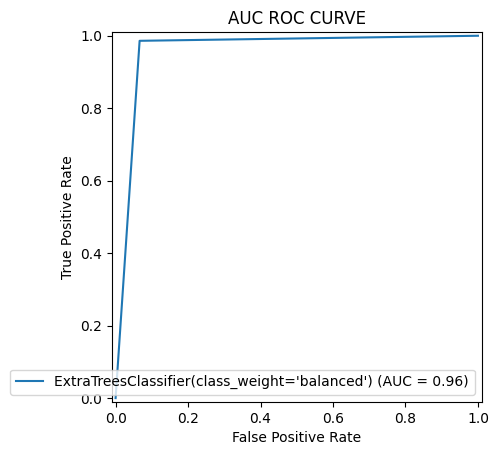

In [123]:
# Plotting AUC ROC Curve
fpr,tpr,thresholds=metrics.roc_curve(ytest,ModelETC.predict(xtest))
roc_auc=metrics.auc(fpr,tpr)
graph=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=ModelETC)
graph.plot()
plt.title('AUC ROC CURVE')

# Saving Model

In [125]:
import pickle

In [126]:
filename='BankMarketing.pkl'

In [127]:
pickle.dump(ModelETC,open(filename,'wb'))

# Test Data

In [128]:
df_test=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_test.csv')
df_test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [129]:
df_test.shape

(13564, 17)

In [130]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [131]:
df_test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [132]:
for d in df_test.columns:
    print(df_test[d].value_counts())
    print(df_test[d].nunique())
    print('\n')

38441    1
23664    1
23378    1
18945    1
32574    1
        ..
4606     1
23686    1
35672    1
8550     1
34839    1
Name: ID, Length: 13564, dtype: int64
13564


32    628
34    609
35    580
31    579
33    566
     ... 
95      1
86      1
92      1
89      1
90      1
Name: age, Length: 75, dtype: int64
75


blue-collar      2890
management       2819
technician       2290
admin.           1540
services         1251
retired           690
entrepreneur      479
self-employed     456
unemployed        398
housemaid         366
student           303
unknown            82
Name: job, dtype: int64
12


married     8119
single      3868
divorced    1577
Name: marital, dtype: int64
3


secondary    6978
tertiary     4000
primary      2043
unknown       543
Name: education, dtype: int64
4


no     13334
yes      230
Name: default, dtype: int64
2


 0       1044
 1         58
 2         47
 3         46
 4         44
         ... 
-140        1
 6495       1
 8180       1
 3684       1
 4

In [133]:
# Encoding
for d in df_test.columns:
    if df_test[d].dtype=='object':
        df_test[d]=LabelEncoder().fit_transform(df_test[d])

In [134]:
df_test.drop('ID',axis=1,inplace=True)

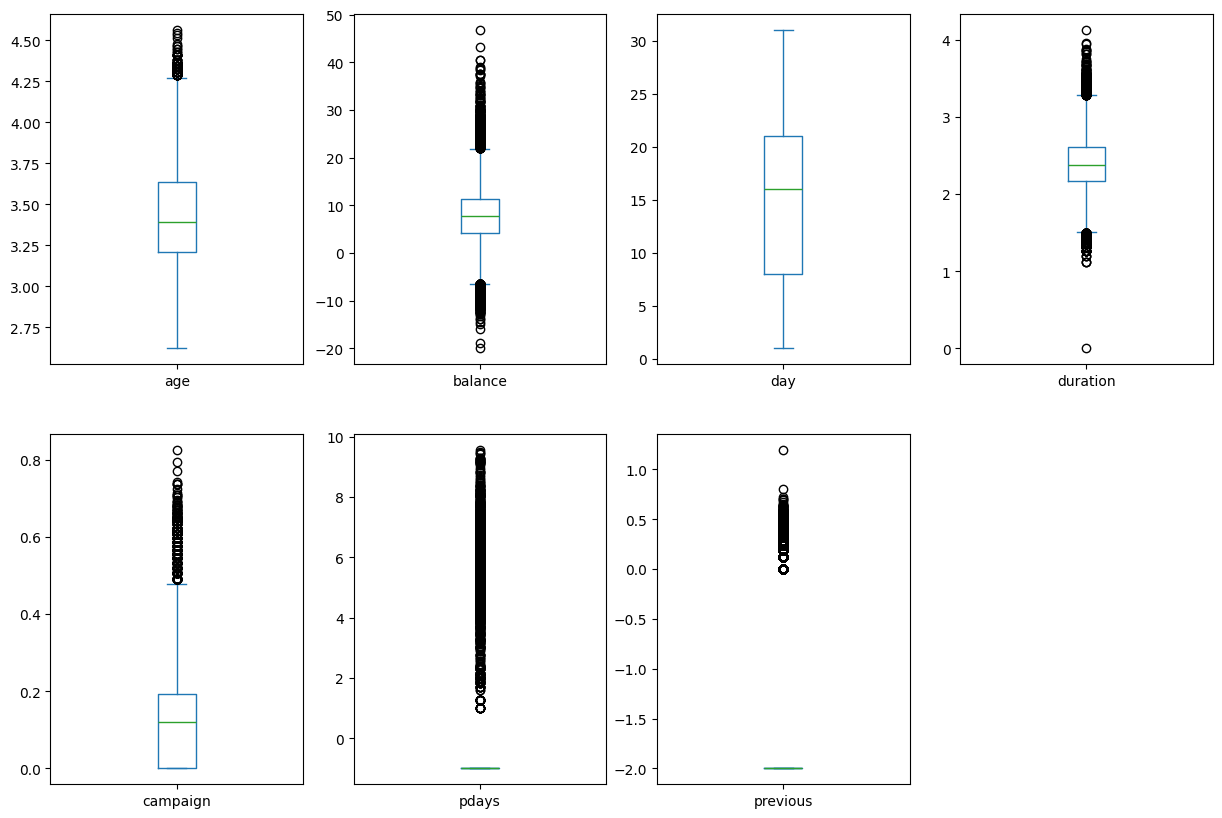

In [135]:
df[['age','balance','day','duration','campaign','pdays','previous']].plot(kind='box',subplots=True,layout=(2,4),figsize=(15,10))
plt.show()

In [136]:
df_test.skew()

age          0.692404
job          0.254647
marital     -0.109220
education    0.192137
default      7.483552
balance      9.165015
housing     -0.226771
loan         1.898587
contact      0.794849
day          0.106806
month       -0.465848
duration     3.017221
campaign     4.958236
pdays        2.555601
previous     8.704583
poutcome    -1.921847
dtype: float64

In [137]:
# Using cuberoot
df_test['age']=np.cbrt(df_test['age'])
df_test['duration']=np.cbrt(df_test['duration'])
df_test['campaign']=np.cbrt(df_test['campaign'])
df_test['pdays']=np.cbrt(df_test['pdays'])
df_test['previous']=np.cbrt(df_test['previous'])
df_test['balance']=np.cbrt(df_test['balance'])

In [138]:
df_test.skew()

age          0.286833
job          0.254647
marital     -0.109220
education    0.192137
default      7.483552
balance     -0.059591
housing     -0.226771
loan         1.898587
contact      0.794849
day          0.106806
month       -0.465848
duration     0.624285
campaign     1.618080
pdays        1.722786
previous     2.005334
poutcome    -1.921847
dtype: float64

In [139]:
df_test['duration']=np.sqrt(df_test['duration'])
df_test['campaign']=np.sqrt(df_test['campaign'])
df_test['previous']=np.sqrt(df_test['previous'])

In [140]:
df_test.skew()

age          0.286833
job          0.254647
marital     -0.109220
education    0.192137
default      7.483552
balance     -0.059591
housing     -0.226771
loan         1.898587
contact      0.794849
day          0.106806
month       -0.465848
duration     0.042567
campaign     1.194658
pdays        1.722786
previous     1.693248
poutcome    -1.921847
dtype: float64

In [141]:
df_test.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [142]:
df_test['campaign']=boxcox(df_test['campaign'],0.5)
df_test['previous']=boxcox(df_test['previous'],0.5)

In [143]:
df_test.skew()

age          0.286833
job          0.254647
marital     -0.109220
education    0.192137
default      7.483552
balance     -0.059591
housing     -0.226771
loan         1.898587
contact      0.794849
day          0.106806
month       -0.465848
duration     0.042567
campaign     1.019260
pdays        1.722786
previous     1.627256
poutcome    -1.921847
dtype: float64

In [144]:
df_test.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [145]:
z=np.abs(zscore(df_test[['age','balance','duration','pdays','previous','campaign']]))
z

,age,balance,duration,pdays,previous,campaign
0,0.841679,0.388757,2.028137,0.471159,0.478098,1.520407
1,2.924132,1.009579,0.796447,0.471159,0.478098,0.966548
2,0.956319,0.337414,1.563095,0.471159,0.478098,0.966548
3,1.469209,1.238460,1.051431,0.471159,0.478098,0.048235
4,0.468951,2.494370,0.540552,0.471159,0.478098,0.966548
...,...,...,...,...,...,...
13559,0.099363,0.594357,0.246492,0.471159,0.478098,0.924684
13560,1.233427,0.870912,0.177670,0.471159,0.478098,0.966548
13561,0.511478,0.133128,0.334392,0.471159,0.478098,0.966548
13562,1.193218,0.043941,0.120085,1.540335,2.134764,0.048235


In [146]:
print(np.where(z>3))

(array([  117,   149,   235,   258,   270,   323,   346,   369,   423,
         432,   468,   537,   577,   677,   704,   749,   809,   818,
         858,   895,   903,   938,   994,  1042,  1048,  1086,  1242,
        1257,  1261,  1272,  1374,  1377,  1413,  1473,  1515,  1571,
        1693,  1839,  1852,  1873,  2030,  2072,  2081,  2133,  2138,
        2201,  2279,  2293,  2294,  2298,  2304,  2305,  2334,  2336,
        2428,  2440,  2453,  2503,  2544,  2587,  2594,  2653,  2656,
        2658,  2687,  2698,  2719,  2765,  2829,  2874,  3050,  3088,
        3101,  3132,  3192,  3196,  3202,  3202,  3215,  3221,  3226,
        3310,  3318,  3350,  3485,  3602,  3647,  3714,  3749,  3756,
        3848,  3873,  3952,  3981,  4021,  4090,  4093,  4100,  4116,
        4127,  4168,  4233,  4352,  4359,  4426,  4436,  4436,  4441,
        4479,  4547,  4603,  4624,  4654,  4664,  4742,  4778,  4970,
        4997,  5000,  5098,  5107,  5223,  5289,  5290,  5446,  5524,
        5559,  5604

In [147]:
dfn_test=df_test[np.abs(z<3).all(axis=1)]

In [148]:
df_test.shape[0]-dfn_test.shape[0]

311

In [149]:
dfn_test1=pd.DataFrame(StandardScaler().fit_transform(dfn_test),columns=dfn_test.columns)
dfn_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,3.174802,7,1,1,0,4.904868,1,0,0,15,8,1.647549,0.322073,-1.000000,-2.000000,3
1,4.272659,5,0,0,0,14.072751,0,0,1,1,5,2.681784,0.000000,-1.000000,-2.000000,3
2,3.141381,6,2,2,0,5.241483,1,0,2,16,8,2.962496,0.000000,-1.000000,-2.000000,3
3,3.848501,7,2,0,0,15.573360,1,0,1,13,8,2.005175,0.118926,-1.000000,-2.000000,3
4,3.556893,1,0,1,0,-8.900130,0,1,2,3,5,2.192235,0.000000,-1.000000,-2.000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,3.391211,4,1,2,0,3.556893,0,0,0,28,1,2.299907,0.244924,-1.000000,-2.000000,3
13560,3.779763,1,1,0,0,13.163613,1,0,2,20,6,2.325106,0.000000,-1.000000,-2.000000,3
13561,3.271066,5,1,0,0,6.580844,1,0,0,29,4,2.267722,0.000000,-1.000000,-2.000000,3
13562,3.072317,0,2,1,0,7.741753,0,0,0,9,9,2.434131,0.118926,4.497941,0.191745,2


In [150]:
#VIF
calculate_vif(dfn_test1)

,variables,VIF FACTOR
0,age,1.286801
1,job,1.048263
2,marital,1.233423
3,education,1.064610
4,default,1.038116
5,balance,1.085755
6,housing,1.191822
7,loan,1.034163
8,contact,1.328500
9,day,1.035260


In [152]:
# Dropping Pdays
dfn_test1.drop('pdays',axis=1,inplace=True)

In [153]:
calculate_vif(dfn_test1)

,variables,VIF FACTOR
0,age,1.286396
1,job,1.047926
2,marital,1.233405
3,education,1.063141
4,default,1.038111
5,balance,1.084796
6,housing,1.180068
7,loan,1.033964
8,contact,1.327113
9,day,1.034311


# Loading Saved Model

In [154]:
Model_ETC=pickle.load(open(filename,'rb'))

In [155]:
print(round(accuracy_score(ytest,Model_ETC.predict(xtest))*100,2))

95.97


In [156]:
test_predict=Model_ETC.predict(dfn_test1)

In [157]:
df_test_predict=pd.DataFrame(dfn_test1,columns=dfn_test1.columns)
df_test_predict

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome
0,-0.843062,0.806798,-0.279673,-0.301039,-0.130822,-0.386907,0.887856,-0.429373,-0.702452,-0.078598,0.828047,-2.095915,1.667738,-0.479307,0.453454
1,2.973113,0.197504,-1.918273,-1.646625,-0.130822,1.053055,-1.126309,-0.429373,0.414878,-1.774317,-0.169418,0.812825,-0.996137,-0.479307,0.453454
2,-0.959236,0.502151,1.358926,1.044548,-0.130822,-0.334037,0.887856,-0.429373,1.532208,0.042525,0.828047,1.602314,-0.996137,-0.479307,0.453454
3,1.498731,0.806798,1.358926,-1.646625,-0.130822,1.288750,0.887856,-0.429373,0.414878,-0.320843,0.828047,-1.090108,-0.012496,-0.479307,0.453454
4,0.485096,-1.021082,-1.918273,-0.301039,-0.130822,-2.555204,-1.126309,2.328978,1.532208,-1.532071,-0.169418,-0.564009,-0.996137,-0.479307,0.453454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13248,-0.090818,-0.107142,-0.279673,1.044548,-0.130822,-0.598628,-1.126309,-0.429373,-0.702452,1.495998,-1.499371,-0.261187,1.029635,-0.479307,0.453454
13249,1.259797,-1.021082,-0.279673,-1.646625,-0.130822,0.910261,0.887856,-0.429373,1.532208,0.527016,0.163071,-0.190315,-0.996137,-0.479307,0.453454
13250,-0.508446,0.197504,-0.279673,-1.646625,-0.130822,-0.123668,0.887856,-0.429373,-0.702452,1.617121,-0.501906,-0.351706,-0.996137,-0.479307,0.453454
13251,-1.199304,-1.325729,1.358926,-0.301039,-0.130822,0.058671,-1.126309,-0.429373,-0.702452,-0.805334,1.160536,0.116310,-0.012496,2.130751,-0.538724


In [158]:
df_test_predict['Predict_Subscribed']=test_predict

In [159]:
df_test_predict

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,Predict_Subscribed
0,-0.843062,0.806798,-0.279673,-0.301039,-0.130822,-0.386907,0.887856,-0.429373,-0.702452,-0.078598,0.828047,-2.095915,1.667738,-0.479307,0.453454,0
1,2.973113,0.197504,-1.918273,-1.646625,-0.130822,1.053055,-1.126309,-0.429373,0.414878,-1.774317,-0.169418,0.812825,-0.996137,-0.479307,0.453454,0
2,-0.959236,0.502151,1.358926,1.044548,-0.130822,-0.334037,0.887856,-0.429373,1.532208,0.042525,0.828047,1.602314,-0.996137,-0.479307,0.453454,0
3,1.498731,0.806798,1.358926,-1.646625,-0.130822,1.288750,0.887856,-0.429373,0.414878,-0.320843,0.828047,-1.090108,-0.012496,-0.479307,0.453454,0
4,0.485096,-1.021082,-1.918273,-0.301039,-0.130822,-2.555204,-1.126309,2.328978,1.532208,-1.532071,-0.169418,-0.564009,-0.996137,-0.479307,0.453454,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13248,-0.090818,-0.107142,-0.279673,1.044548,-0.130822,-0.598628,-1.126309,-0.429373,-0.702452,1.495998,-1.499371,-0.261187,1.029635,-0.479307,0.453454,0
13249,1.259797,-1.021082,-0.279673,-1.646625,-0.130822,0.910261,0.887856,-0.429373,1.532208,0.527016,0.163071,-0.190315,-0.996137,-0.479307,0.453454,0
13250,-0.508446,0.197504,-0.279673,-1.646625,-0.130822,-0.123668,0.887856,-0.429373,-0.702452,1.617121,-0.501906,-0.351706,-0.996137,-0.479307,0.453454,0
13251,-1.199304,-1.325729,1.358926,-0.301039,-0.130822,0.058671,-1.126309,-0.429373,-0.702452,-0.805334,1.160536,0.116310,-0.012496,2.130751,-0.538724,1


0    11074
1     2179
Name: Predict_Subscribed, dtype: int64


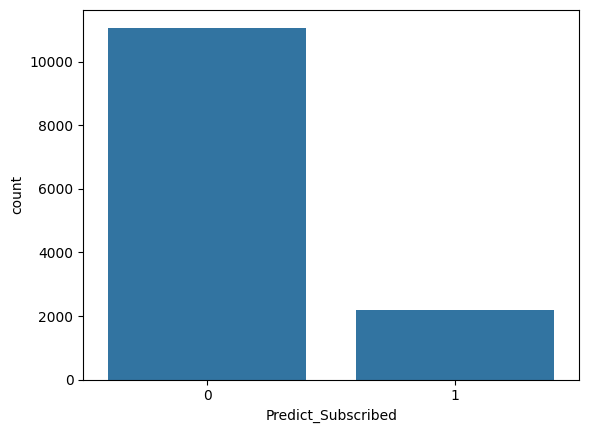

In [163]:
print(df_test_predict['Predict_Subscribed'].value_counts())
sns.countplot(x='Predict_Subscribed',data=df_test_predict)
plt.show()